In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [3]:
from zipfile import ZipFile

data_path = 'C:\\Users\\patha\\Downloads\\archive.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [9]:
import os
import zipfile

archive_path = 'C:\\Users\\patha\\Downloads\\archive.zip'
extract_path = 'C:\\Users\\patha\\Downloads\\extracted'

# Extract the archive
with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Specify the extracted folder path
extracted_folder = os.path.join(extract_path, 'dogvscat')

# Check if the extracted folder exists
if os.path.exists(extracted_folder):
    # List the classes in the extracted folder
    classes = os.listdir(extracted_folder)
    print(classes)
else:
    print("The extracted folder does not exist.")


['test', 'train']


In [12]:
import os
import zipfile

archive_path = 'C:\\Users\\patha\\Downloads\\archive.zip'
extract_path = 'C:\\Users\\patha\\Downloads\\extracted'

# Extract the archive
with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Specify the extracted folder path
extracted_folder = os.path.join(extract_path, 'dogvscat')

# Specify the paths to the cat and dog directories
cat_dir = os.path.join(extracted_folder, 'test')
dog_dir = os.path.join(extracted_folder, 'train')

# Check if the directories exist
if os.path.exists(cat_dir) and os.path.exists(dog_dir):
    cat_names = os.listdir(cat_dir)
    dog_names = os.listdir(dog_dir)
    pic_index = 210
    # Rest of your code...
    # (Replace <Figure size 1600x1600 with 0 Axes> with the relevant code)

else:
    print("The specified directories do not exist.")


In [14]:
base_dir = 'C:\\Users\\patha\\Downloads\\extracted\\dogvscat'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 550 files belonging to 2 classes.
Using 495 files for training.
Found 550 files belonging to 2 classes.
Using 55 files for validation.


In [15]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model
input_shape = (None, 200)  # Replace your_input_shape_here with the appropriate input shape
model.build(input_shape)

# Plot the model
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [3]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


1/1 [==============================] - 0s 31ms/step
Dog


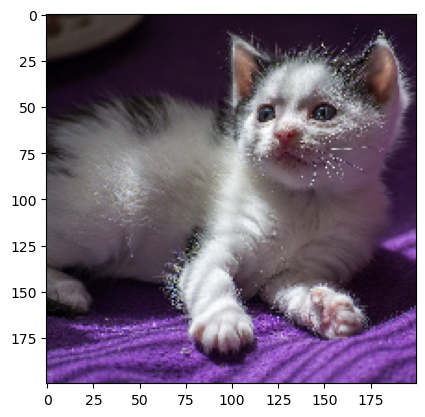

In [20]:
import numpy as np
test_image = image.load_img('C:\\Users\\patha\\Downloads\\extracted\\dogvscat\\test\\0\\250.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
if np.any(result >= 0.5):
    print("Dog")
else:
    print("Cat")



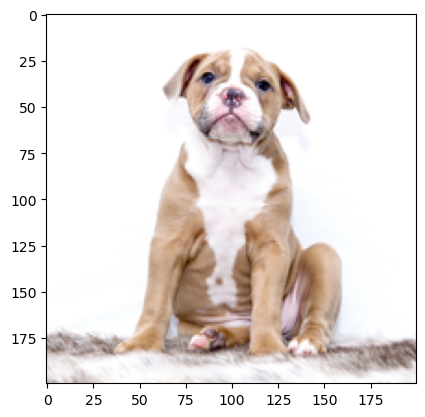

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

# Input image
test_image = Image.open('C:\\Users\\patha\\Downloads\\extracted\\dogvscat\\test\\1\\254.jpg')
test_image = test_image.resize((200, 200))  # Resize the image to the desired size

# For showing the image
plt.imshow(test_image)
plt.show()
